Author: "Christopher Redd-Adams" 12/10/2023

Data modeling method used: logistical regression model was chosen

The model chosen below was logitical regression based on the what we were training for which in this case checking to see if consumers generated revenue on the website which was catagroised as TRUE or FALSE aka catagorical data.

Logistical regression is specfically designed to train for binary targets such as TRUE or FALSE while linear regession is more well suited for continuous outcomes and may assume the dependant varibale is is normally distributed. 


In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



Data Preprocessing:
-Encodes categorical variables ('VisitorType', 'TrafficType') using LabelEncoder.

Handling 'Month' Column:
-Splits the 'Month' column into lists of months for each record.
-Uses MultiLabelBinarizer to transform the 'Month' column into a binary matrix, where columns represent months and rows indicate the presence of a month in a record.

Preparing Features and Target:
-Defines the features (X) by dropping the target column ('Revenue') from the DataFrame.
-Sets the target variable (y) as 'Revenue'.

Splitting the Data:
-Splits the data into training and testing sets using train_test_split from sklearn.model_selection.

Initializing and Training the Logistic Regression Model:
-Initializes a logistic regression model.
-Fits the model using the training data.

Model Prediction and ROC Calculation:
-Predicts probabilities on the test set using predict_proba.
-Computes the Receiver Operating Characteristic (ROC) curve and calculates the Area Under the Curve (AUC) using roc_curve and auc from sklearn.metrics.

Plotting the ROC Curve:
-Plots the ROC curve using matplotlib.pyplot.
-Defines the x-axis as False Positive Rate (FPR) and y-axis as True Positive Rate (TPR).
-Displays the AUC value in the legend for the ROC curve.
-Sets labels, title, and legend for the plot.

Model Evaluation:
-Computes the accuracy of the model on the test set using model.score.
-Prints the accuracy.

The resulting visualization is an ROC curve representing the performance of the logistic regression model in distinguishing between positive and negative classes at different threshold settings. The AUC value quantifies the model's predictive performance, where higher AUC indicates better discrimination ability.


/Users/chrisredd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


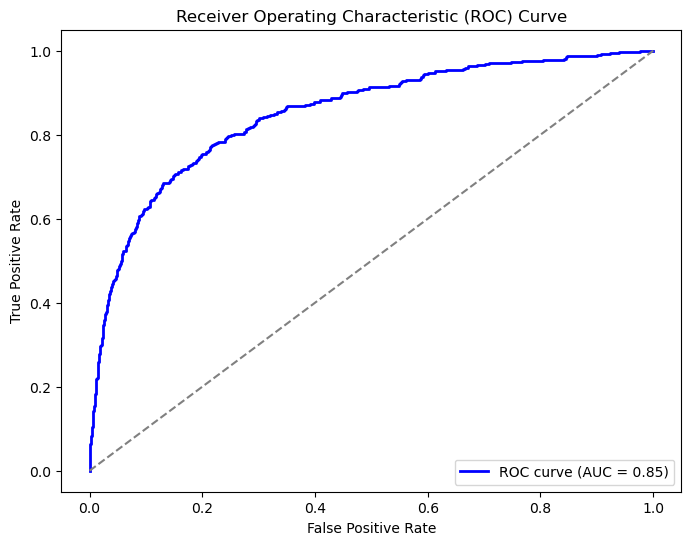

Accuracy: 0.874894336432798


In [24]:

# Load data from the cleaned_online_shopping_data (1) CSV file
file_path = 'cleaned_online_shopping_data (1).csv' 
df = pd.read_csv(file_path)

# Encode categorical variables (VisitorType, TrafficType)
label_encoder = LabelEncoder()
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['TrafficType'] = label_encoder.fit_transform(df['TrafficType'])

# Define the order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a list of lists containing months as individual lists for each record
month_lists = df['Month'].str.split(',')
mlb = MultiLabelBinarizer(classes=months_order)  # Set the classes parameter to ensure the month order

# Fit and transform 'Month' column using MultiLabelBinarizer
month_encoded = mlb.fit_transform(month_lists)
df_months_encoded = pd.DataFrame(month_encoded, columns=mlb.classes_)

# Combine the encoded months DataFrame with the original DataFrame
df = pd.concat([df, df_months_encoded], axis=1)
df.drop('Month', axis=1, inplace=True)

# Define features and defines the target (Revenue)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes the regresion model and trains it
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicts the probablities on the test 
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plots ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy of our model is 0.874%